1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If 
your data deals with multiple classes, you can take any two classes. Steps below (refer below 
diagram for understanding): 
• Calculate the mean for each class (also called as class centroid) 
(Suggestion: You may use numpy.mean() function for finding the average vector for all 
vectors in a given class. Please define the axis property appropriately to use this function. EX: 
feat_vecs.mean(axis=0)) 
• Calculate spread (standard deviation) for each class 
(Suggestion: You may use numpy.std() function for finding the standard deviation vector 
for all vectors in a given class. Please define the axis property appropriately to use this 
function.) 
• Calculate the distance between mean vectors between classes 
(Suggestion: numpy.linalg.norm(centroid1 – centroid2) gives the Euclidean 
distance between two centroids.)

Centroid of Setosa: [5.006 3.418 1.464 0.244]
Centroid of Versicolor: [5.936 2.77  4.26  1.326]
Centroid of Virginica: [6.588 2.974 5.552 2.026]
Spread of Setosa: [0.34894699 0.37719491 0.17176728 0.10613199]
Spread of Versicolor: [0.51098337 0.31064449 0.46518813 0.19576517]
Spread of Virginica: [0.62948868 0.31925538 0.54634787 0.27188968]
Interclass Distance between Setosa and Versicolor: 3.2052
Interclass Distance between Setosa and Virginica: 4.7526
Interclass Distance between Versicolor and Virginica: 1.6205


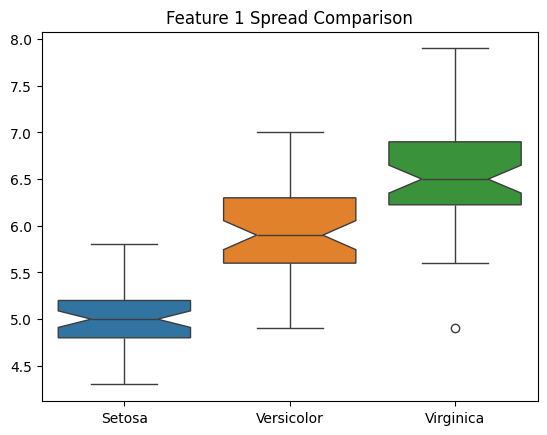

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("C:\\Users\\rishi\\PycharmProjects\\ML-Lab3\\Iris.csv")

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = df['Species'].values

class_0 = X[y == 'Iris-setosa']
class_1 = X[y == 'Iris-versicolor']
class_2 = X[y == 'Iris-virginica']

centroid_0 = np.mean(class_0, axis=0)
centroid_1 = np.mean(class_1, axis=0)
centroid_2 = np.mean(class_2, axis=0)

spread_0 = np.std(class_0, axis=0)
spread_1 = np.std(class_1, axis=0)
spread_2 = np.std(class_2, axis=0)

interclass_distance_01 = np.linalg.norm(centroid_0 - centroid_1)
interclass_distance_02 = np.linalg.norm(centroid_0 - centroid_2)
interclass_distance_12 = np.linalg.norm(centroid_1 - centroid_2)

print(f"Centroid of Setosa: {centroid_0}")
print(f"Centroid of Versicolor: {centroid_1}")
print(f"Centroid of Virginica: {centroid_2}")
print(f"Spread of Setosa: {spread_0}")
print(f"Spread of Versicolor: {spread_1}")
print(f"Spread of Virginica: {spread_2}")
print(f"Interclass Distance between Setosa and Versicolor: {interclass_distance_01:.4f}")
print(f"Interclass Distance between Setosa and Virginica: {interclass_distance_02:.4f}")
print(f"Interclass Distance between Versicolor and Virginica: {interclass_distance_12:.4f}")

sns.boxplot(data=[class_0[:, 0], class_1[:, 0], class_2[:, 0]], notch=True)
plt.xticks([0, 1, 2], ['Setosa', 'Versicolor', 'Virginica'])
plt.title("Feature 1 Spread Comparison")
plt.show()


2. Take any feature from your dataset. Observe the density pattern for that feature by plotting the 
histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and 
variance from the available data.

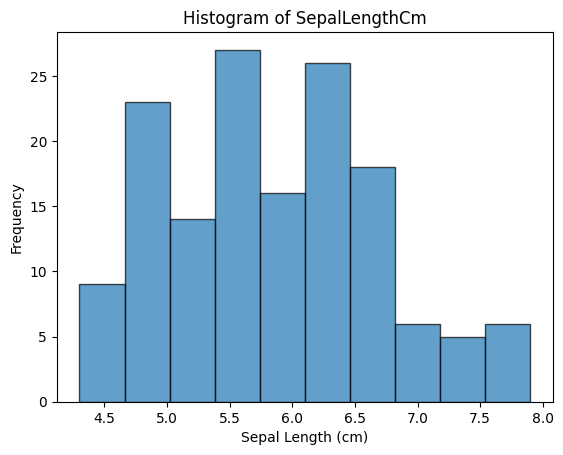

Mean of SepalLengthCm: 5.8433
Variance of SepalLengthCm: 0.6811


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("C:\\Users\\rishi\\PycharmProjects\\ML-Lab3\\Iris.csv")

feature = df['SepalLengthCm']


mean_value = np.mean(feature)
variance_value = np.var(feature)


plt.hist(feature, bins=10, edgecolor='black', alpha=0.7)
plt.title("Histogram of SepalLengthCm")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()


print(f"Mean of SepalLengthCm: {mean_value:.4f}")
print(f"Variance of SepalLengthCm: {variance_value:.4f}")


3.Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1 
to 10. Make a plot of the distance and observe the nature of this graph. 

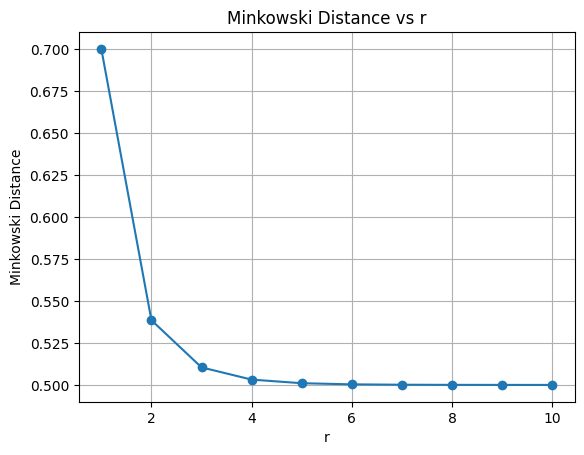

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("C:\\Users\\rishi\\PycharmProjects\\ML-Lab3\\Iris.csv")


df = df.drop(columns=['Id', 'Species'])


x = df.iloc[0].values  # First row
y = df.iloc[1].values  # Second row


def minkowski_distance(x, y, r):
    return np.sum(np.abs(x - y) ** r) ** (1 / r)

r_values = np.arange(1, 11)
distances = [minkowski_distance(x, y, r) for r in r_values]


plt.plot(r_values, distances, marker='o')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs r')
plt.grid(True)
plt.show()


4. Divide dataset in your project into two parts – train & test set. To accomplish this, use the train
test_split() function available in SciKit. See below sample code for help: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("C:\\Users\\rishi\\PycharmProjects\\ML-Lab3\\Iris.csv")

X = df.drop(columns=['Id', 'Species'])
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set shape: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set shape: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set shape: X_train = (105, 4), y_train = (105,)
Testing set shape: X_test = (45, 4), y_test = (45,)


5. Train a kNN classifier (k =3) using the training set obtained from above exercise. Following code 
for help

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("C:\\Users\\rishi\\PycharmProjects\\ML-Lab3\\Iris.csv")

X = df.drop(columns=['Id', 'Species'])
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neigh = KNeighborsClassifier(n_neighbors=5)

neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of kNN classifier with k=5: {accuracy:.2f}")

Accuracy of kNN classifier with k=5: 1.00


6.. Test the accuracy of the kNN using the test set obtained from above exercise. Following code for 
help.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

df = pd.read_csv("C:\\Users\\rishi\\PycharmProjects\\ML-Lab3\\Iris.csv")

X = df.drop(columns=['Id', 'Species'])
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



7. Use the predict() function to study the prediction behavior of the classifier for test vectors.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("C:\\Users\\rishi\\PycharmProjects\\ML-Lab3\\Iris.csv")

X = df.drop(columns=['Id', 'Species'])
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

print("Predictions for the test set:\n", y_pred)

test_vector = X_test.iloc[0].values.reshape(1, -1)
predicted_class = neigh.predict(test_vector)

print(f"Predicted class for the test vector: {predicted_class[0]}")

Predictions for the test set:
 ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa']
Predicted class for the test vector: Iris-versicolor


C:\Users\rishi\PycharmProjects\ML-Lab3\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


8.. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to 
11 and make an accuracy plot.

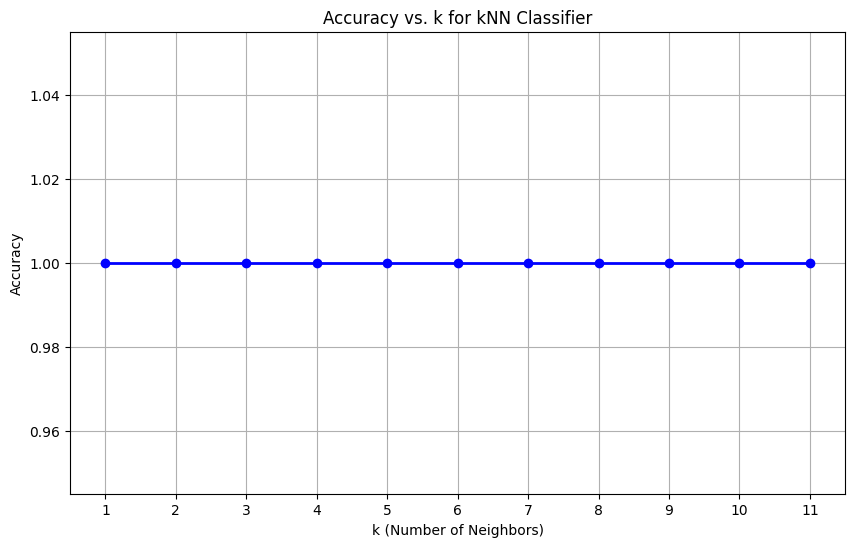

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("C:\\Users\\rishi\\PycharmProjects\\ML-Lab3\\Iris.csv")

X = df.drop(columns=['Id', 'Species'])
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

accuracy_values = []

for k in range(1, 12):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    accuracy = neigh.score(X_test, y_test)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), accuracy_values, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Accuracy vs. k for kNN Classifier')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(1, 12))
plt.show()

9.Please evaluate confusion matrix for your classification problem. From confusion matrix, the 
other performance metrics such as precision, recall and F1-Score measures for both training and test 
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit). 

Confusion Matrix for Training Data:
[[31  0  0]
 [ 0 34  3]
 [ 0  3 34]]

Confusion Matrix for Test Data:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report for Training Data:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        31
Iris-versicolor       0.92      0.92      0.92        37
 Iris-virginica       0.92      0.92      0.92        37

       accuracy                           0.94       105
      macro avg       0.95      0.95      0.95       105
   weighted avg       0.94      0.94      0.94       105


Classification Report for Test Data:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00     

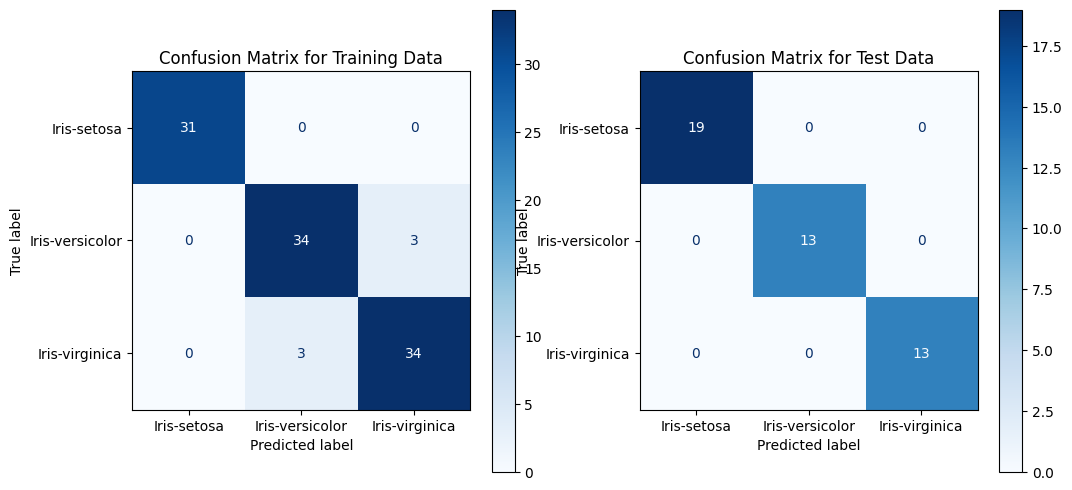

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

df = pd.read_csv("C:\\Users\\rishi\\PycharmProjects\\ML-Lab3\\Iris.csv")

X = df.drop(columns=['Id', 'Species'])
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)

y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Training Data:")
print(cm_train)

cm_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Test Data:")
print(cm_test)

print("\nClassification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=neigh.classes_).plot(ax=ax[0], cmap='Blues')
ax[0].set_title('Confusion Matrix for Training Data')

ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=neigh.classes_).plot(ax=ax[1], cmap='Blues')
ax[1].set_title('Confusion Matrix for Test Data')

plt.show()